<a href="https://colab.research.google.com/github/AUT-Student/CN-HW2/blob/main/CN_HW2_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><b>In the name of God</b></center>

<b>Course</b>: Complex Network
<br>
<b>Description:</b> HomeWork 2 | Question 2
<br>
<b>Developer</b>: Alireza Mazochi (400131075)

# Libraries

In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!pip install --upgrade scipy networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 6.5 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3


# Dataset

In [3]:
!gdown 17050A6f0ATXkkmaqB9aI7fxAa8zfHO5C

Downloading...
From: https://drive.google.com/uc?id=17050A6f0ATXkkmaqB9aI7fxAa8zfHO5C
To: /content/CN_HW2_dataset.zip
100% 282k/282k [00:00<00:00, 31.4MB/s]


In [4]:
!unzip /content/CN_HW2_dataset.zip

Archive:  /content/CN_HW2_dataset.zip
  inflating: airports.codes          
  inflating: airports.edges          
  inflating: bible.edges             
  inflating: bible.names             
  inflating: name_of_airports.csv    


In [5]:
airport_graph = nx.Graph()

with open("/content/airports.edges") as file:
  for i, line in enumerate(file.readlines()):
    source, destination = line.split()[:2]
    airport_graph.add_edge(source, destination)

In [6]:
bible_graph = nx.Graph()

with open("/content/bible.edges") as file:
  for i, line in enumerate(file.readlines()):
    source, destination = line.split()[:2]
    bible_graph.add_edge(source, destination)

In [7]:
airport_graph.number_of_nodes()

1574

In [8]:
bible_graph.number_of_nodes()

1773

# Centrality Metric

In [9]:
def closeness(graph):
  bigest_component = None
  size_bigest_component = -1
  for component in nx.connected_components(graph):
    if len(component) > size_bigest_component:
      size_bigest_component = len(component)
      bigest_component = component
  
  closeness_dict = dict()

  n = len(bigest_component)

  shortest_path_dict = dict(nx.shortest_path_length(graph))

  for node_i in bigest_component:
    shortest_path_sum = 0
    for node_j in bigest_component:
      shortest_path_sum += shortest_path_dict[node_i][node_j]

    closeness_dict[node_i] = n / shortest_path_sum

  for node in graph.nodes:
    if node not in bigest_component:
      closeness_dict[node] = 0

  return closeness_dict

In [10]:
def efficiency(graph):
  nodes = graph.nodes

  n = len(nodes)

  efficiency_dict = dict()
  shortest_path_dict = dict(nx.shortest_path_length(graph))

  for node_i in nodes:
    inverse_distanec_sum = 0
    node_i_component = nx.node_connected_component(graph, node_i)
    for node_j in nodes:
      if node_j != node_i and node_j in node_i_component:
        inverse_distanec_sum += 1/shortest_path_dict[node_i][node_j]

      efficiency_dict[node_i] = inverse_distanec_sum/(n-1)
  
  return efficiency_dict

In [11]:
def degree(graph):
  degree_dict = dict()

  for node in graph.nodes:
    degree_dict[node] = nx.degree(graph, node)
  
  return degree_dict

In [12]:
def katz(graph, alpha=0.1):
  A = nx.adjacency_matrix(graph).todense()
  n = len(graph)
  I = np.identity(n)
  K = (np.linalg.inv(I - alpha * A) - I) @ np.full(n, 1)  
  degree_dict = dict()
  for node, score in zip(graph.nodes, K):
    degree_dict[node] = score
  return degree_dict

# Results

In [ ]:
for metric_name, metric in zip(["closeness", "efficiency", "degree", "katz"],
                               [closeness, efficiency, degree, katz]):
  for graph_name, graph in zip(["bible", "airport"], [bible_graph, airport_graph]):
    scores = metric(graph)
    scores = sorted(scores.items(), key=lambda item:item[1], reverse=True)
    with open(f"{graph_name}_{metric_name}.txt", "w") as file:
      for id, score in scores: 
        file.write(f"{id}: {round(score, 3)}\n")

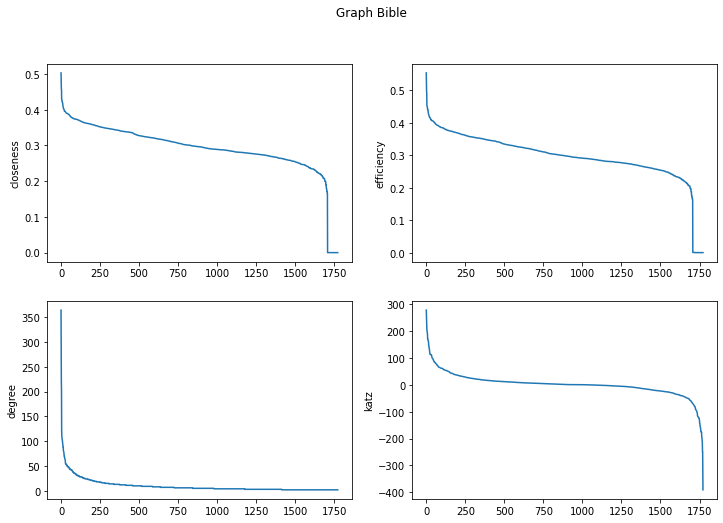

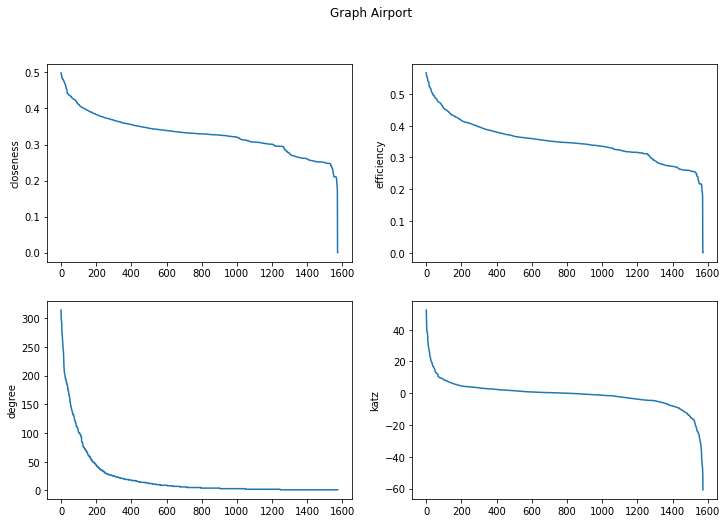

In [19]:
for graph_name, graph in zip(["Bible", "Airport"], [bible_graph, airport_graph]):
  fig, ax = plt.subplots(2, 2)

  for i, metric_name, metric in zip(range(4),
                                ["closeness", "efficiency", "degree", "katz"],
                                [closeness, efficiency, degree, katz]):
    scores = metric(graph)
    scores = sorted(scores.items(), key=lambda item:item[1], reverse=True)
    scores = [score for (id, score) in scores]
    
    ax[i//2][i%2].set_ylabel(f"{metric_name}")
    ax[i//2][i%2].plot(scores)


  fig.suptitle(f"Graph {graph_name}")
  fig.set_size_inches(12,8)
  plt.show()

In [14]:
bible_names = pd.read_csv("/content/bible.names", delimiter=" ", index_col=0)
airport_name = pd.read_csv("/content/airports.codes", delimiter=" ", index_col=0)
airport_description = pd.read_csv("/content/name_of_airports.csv", index_col=0)

In [28]:
for metric_name, metric in zip(["closeness", "efficiency", "degree", "katz"],
                                [closeness, efficiency, degree, katz]):
  print(f"{metric_name}:")
  scores = metric(bible_graph)
  scores = sorted(scores.items(), key=lambda item:item[1], reverse=True)[:10]

  for id, score in scores:
    name = bible_names.loc[int(id)]["biblicalNouns"]
    print(f"id = {id}, score={score}, name={name}")

closeness:
id = 1, score=0.5032429245283019, name=israel
id = 2, score=0.4712865819988956, name=judah
id = 3, score=0.45850120870265915, name=jerusalem
id = 4, score=0.45653918159935813, name=david
id = 10, score=0.4291101055806938, name=egypt
id = 27, score=0.42814145974416856, name=ephraim
id = 29, score=0.4256857855361596, name=manasseh
id = 19, score=0.42536755544480437, name=benjamin
id = 34, score=0.4204433497536946, name=joseph
id = 6, score=0.4203398177788722, name=moses
efficiency:
id = 1, score=0.5534236267870628, name=israel
id = 2, score=0.511042136945077, name=judah
id = 4, score=0.4956734386757014, name=david
id = 3, score=0.49256019563582176, name=jerusalem
id = 10, score=0.4542983446200214, name=egypt
id = 27, score=0.45036681715576155, name=ephraim
id = 19, score=0.4495861550037672, name=benjamin
id = 29, score=0.4490312264860849, name=manasseh
id = 6, score=0.4419394281414654, name=moses
id = 34, score=0.4414597441685534, name=joseph
degree:
id = 1, score=364, name=is

In [15]:
airport_codes = []
for metric_name, metric in zip(["closeness", "efficiency", "degree", "katz"],
                                [closeness, efficiency, degree, katz]):
  print(f"{metric_name}:")
  scores = metric(airport_graph)
  scores = sorted(scores.items(), key=lambda item:item[1], reverse=True)[:10]

  for id, score in scores:
    name = airport_name.loc[int(id)]["AirportName"]
    print(f"id = {id}, score={score}, name={name}")
    airport_codes.append(name)

print("Airport Description:")
for airport_code in sorted(set(airport_codes)):
  description = airport_description.loc[airport_code]["Description"]
  print(f"code = {airport_code}, description = {description}") 

closeness:
id = 114, score=0.4987309644670051, name=ATL
id = 877, score=0.49558638083228246, name=LAX
id = 1068, score=0.4951181102362205, name=MSP
id = 389, score=0.4909431605246721, name=DEN
id = 709, score=0.4903306300686213, name=IAD
id = 766, score=0.48608534322820035, name=JFK
id = 982, score=0.485935085007728, name=MCO
id = 1200, score=0.484736355226642, name=ORD
id = 500, score=0.4822085889570552, name=EWR
id = 711, score=0.48161764705882354, name=IAH
efficiency:
id = 114, score=0.5660309387582153, name=ATL
id = 877, score=0.5594087730451397, name=LAX
id = 709, score=0.5572155117609695, name=IAD
id = 1068, score=0.5541110404746794, name=MSP
id = 766, score=0.5529349438440387, name=JFK
id = 1200, score=0.5526806526806569, name=ORD
id = 389, score=0.552436956982415, name=DEN
id = 500, score=0.5462386098749774, name=EWR
id = 711, score=0.5444161898707387, name=IAH
id = 982, score=0.5398813307904243, name=MCO
degree:
id = 114, score=314, name=ATL
id = 709, score=299, name=IAD
id = 